In [74]:
import pandas as pd
import numpy as np
import matplotlib as mpl
#import matplotlib.finance as mpl_finance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
stocks = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv')
stocks['Year'] = stocks['Date'].astype(str).str[0:4]
stocks['Month'] = stocks['Date'].astype(str).str[5:7]
d = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr','05': 'May','06': 'Jun','07': 'July','08': 'Aug','09': 'Sep','10': 'Oct','11': 'Nov','12': 'Dec'}
stocks['MonthName'] = stocks['Month'].map(d)
stocks['Profit']=stocks['Close']-stocks['Open']
stocks.head()

,Date,Open,High,Low,Close,Volume,Name,Year,Month,MonthName,Profit
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,01,Jan,1.35
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,01,Jan,-0.78
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,01,Jan,-0.42
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,01,Jan,-0.01
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,01,Jan,0.52


In [81]:
different_stocks = stocks['Name'].unique()
different_stocks

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

## Total stock volume for all companies since 2006

Text(0.5,1,'Total stock Volume from 2006 to 2017')

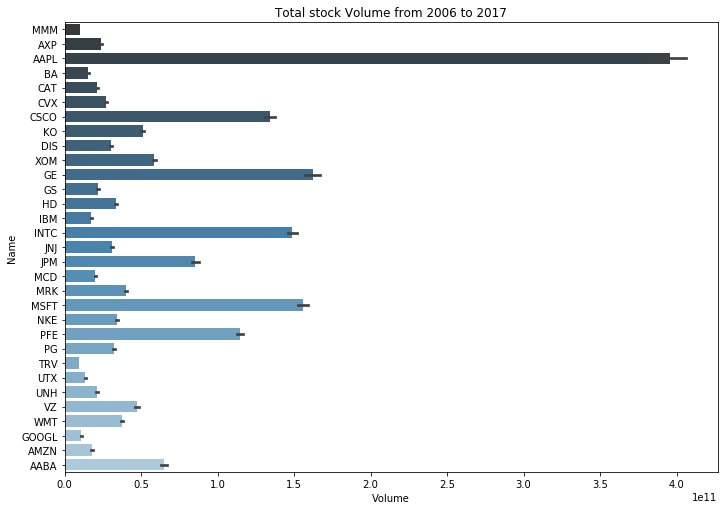

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(x='Volume',y='Name',data=stocks,palette="Blues_d",estimator=sum).set_title('Total stock Volume from 2006 to 2017')

## Heatmap for comparing the stock volume across all years and months for Tech companies AAPL, GOOGL, MSFT, INTC, AMZN

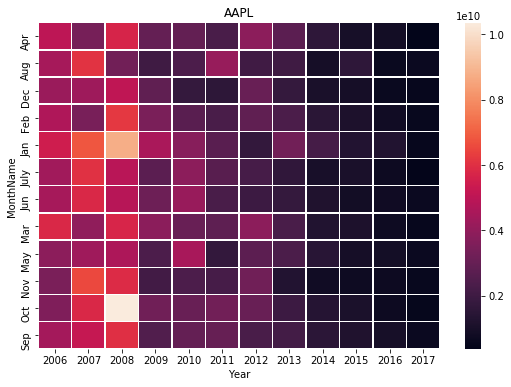

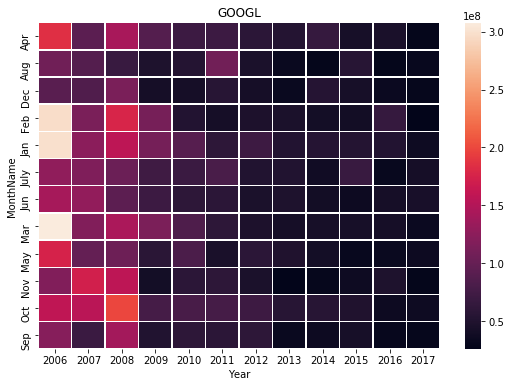

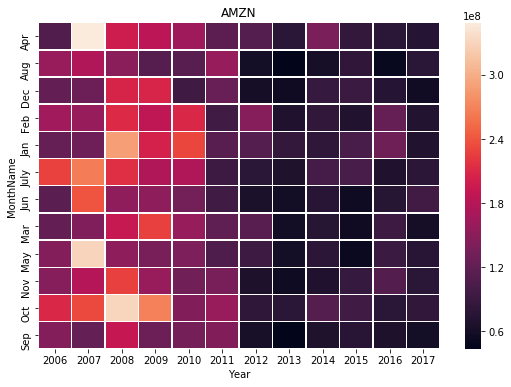

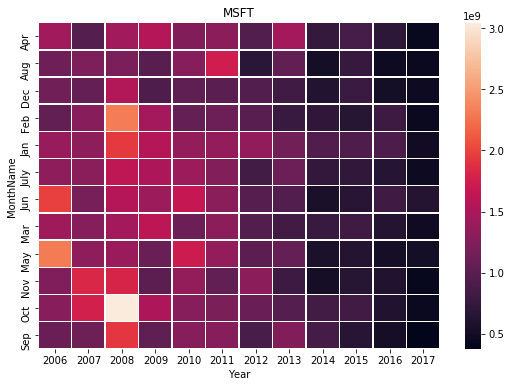

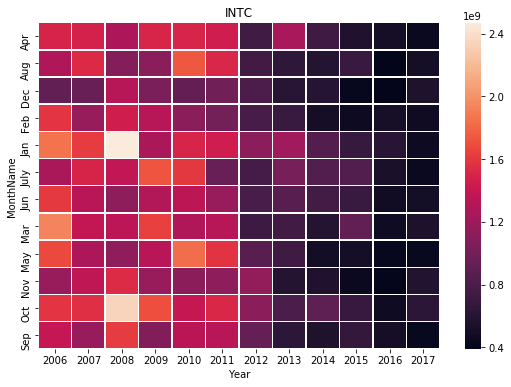

In [83]:
tech_companies = ['AAPL','GOOGL','AMZN','MSFT','INTC']

for i in tech_companies:
    one_stock = stocks[stocks['Name']==i]
    pivoted = pd.pivot_table(one_stock, values='Volume', columns='Year', index=['MonthName'],aggfunc=np.sum)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(pivoted, annot=False, fmt="d", linewidths=.5, ax=ax)
    ax.set_title(i)

## Stock history of Closing  prices for Tech companies (AAPL, AMZN, GOOGL, INTC, MSFT) since 2006

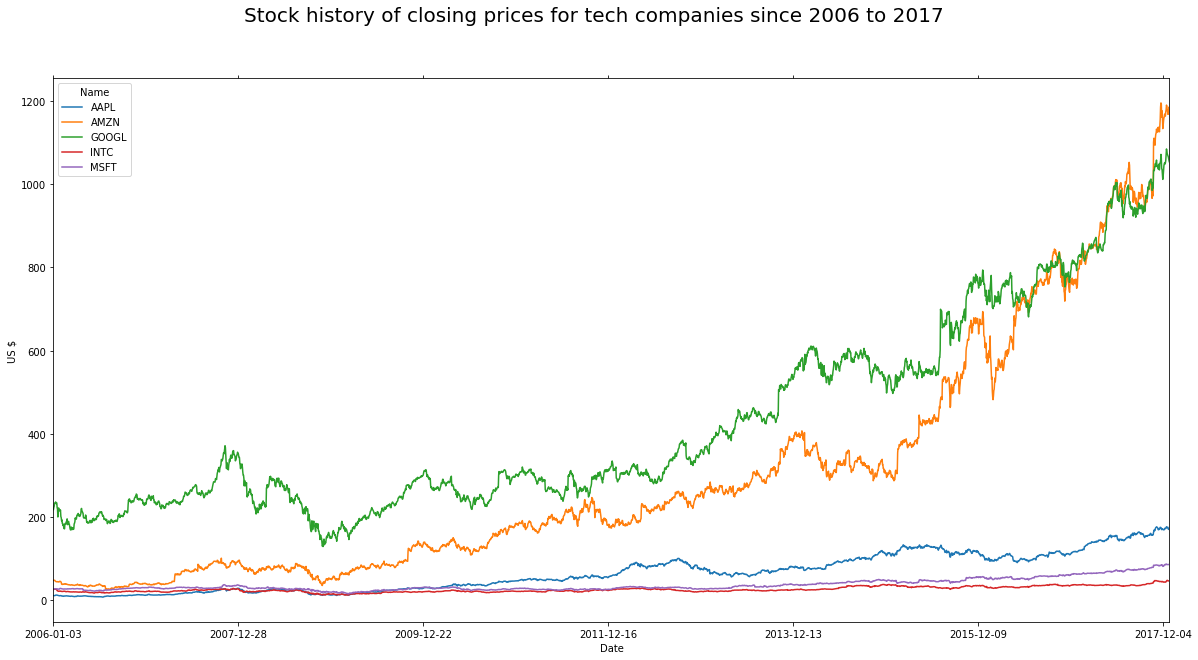

In [84]:
tech_stocks = stocks[(stocks['Name']=='GOOGL') | (stocks['Name']=='AMZN') | (stocks['Name']=='MSFT') | (stocks['Name']=='AAPL') | (stocks['Name']=='INTC')]
pivoted = pd.pivot_table(tech_stocks, values='Close', columns='Name', index=['Date'])
plt.figure(figsize=(20,8))

fig,ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Stock history of closing prices for tech companies since 2006 to 2017', fontsize=20)
pivoted.plot(x_compat=True,ax=ax)

ax.xaxis.set_tick_params(reset=True)
ax.set_ylabel('US $')

plt.show()

## Histogram of Closing stock prices for Financial companies (AXP, JPM, TRV) since 2015

Text(0.5,0,'Closing')

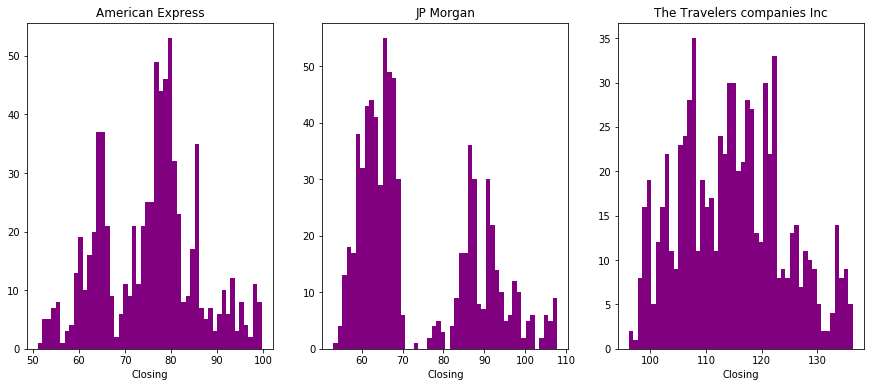

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

axes[0].hist(stocks[(stocks['Name']=='AXP') & (stocks['Year']>='2015')]['Close'],bins=50,color="purple", lw=5)
axes[0].set_title('American Express')
axes[0].set_xlabel('Closing')

axes[1].hist(stocks[(stocks['Name']=='JPM') & (stocks['Year']>='2015')]['Close'], bins=50,color="purple", lw=5)
axes[1].set_title('JP Morgan')
axes[1].set_xlabel('Closing')

axes[2].hist(stocks[(stocks['Name']=='TRV') & (stocks['Year']>='2015')]['Close'], bins=50,color="purple", lw=5)
axes[2].set_title('The Travelers companies Inc')
axes[2].set_xlabel('Closing')

# Opening and Closing stocks for Walt Disney in 2017

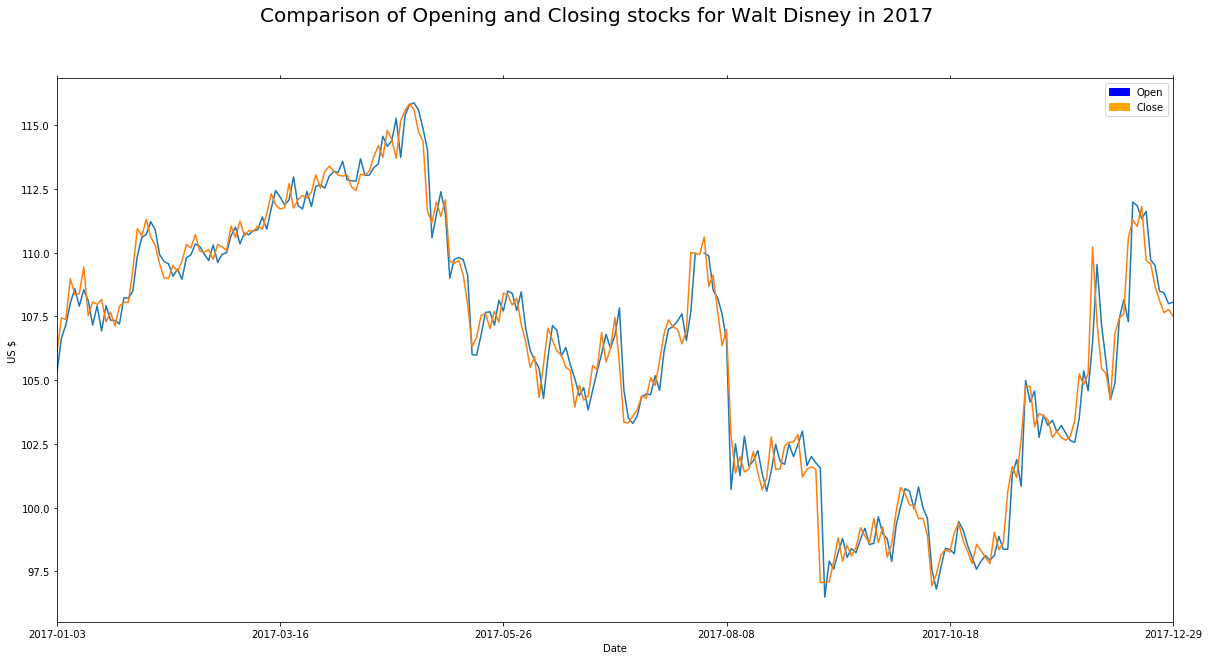

In [86]:
import matplotlib.patches as mpatches

Apple = stocks[(stocks['Name']=='DIS') & (stocks['Year']=='2017')]
pivoted_Open = pd.pivot_table(Apple, values='Open', columns='Name', index=['Date'])
pivoted_Close = pd.pivot_table(Apple, values='Close', columns='Name', index=['Date'])

fig,ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Comparison of Opening and Closing stocks for Walt Disney in 2017', fontsize=20)
plt_open = pivoted_Open.plot(x_compat=True,ax=ax,label='Open')
plt_close = pivoted_Close.plot(x_compat=True,ax=ax,label='Close')

ax.set_xlabel('Date')
ax.set_ylabel('US $')
ax.xaxis.set_tick_params(reset=True)

blue_line = mpatches.Patch(color='blue', label='Open')
orange_line = mpatches.Patch(color='orange', label='Close')
plt.legend(handles=[blue_line, orange_line])

plt.show()

## Correlation matrix of closing stock prices for pharmacetical (JNJ, UNH, MRK,PFE) and Manufacturing (CAT, BA, MMM, UTX) companies

([<matplotlib.axis.YTick at 0x1e6bd492400>,
 <a list of 8 Text yticklabel objects>)

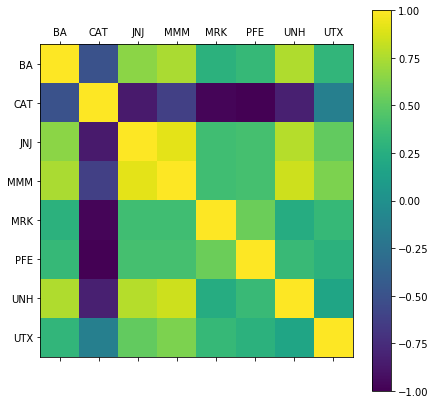

In [87]:
names = ['JNJ','UNH','MRK','PFE','CAT','BA','MMM','UTX']
PM_stocks = stocks[stocks['Name'].isin(names)]

pivoted10_Close = pd.pivot_table(PM_stocks, values='Close', columns='Name', index=['Date'])
corr_Close = pivoted10_Close.corr()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(7, 7))

cax = ax.matshow(corr_Close, vmin=-1, vmax=1)
fig.colorbar(cax, fraction=0.15)
ax.matshow(corr_Close)
plt.xticks(range(len(corr_Close.columns)), corr_Close.columns)
plt.yticks(range(len(corr_Close.columns)), corr_Close.columns)

## Stock Volume Comparison for Petroleum (CVX, XOM) and food (KO, MCD) companies since 2015 to 2017

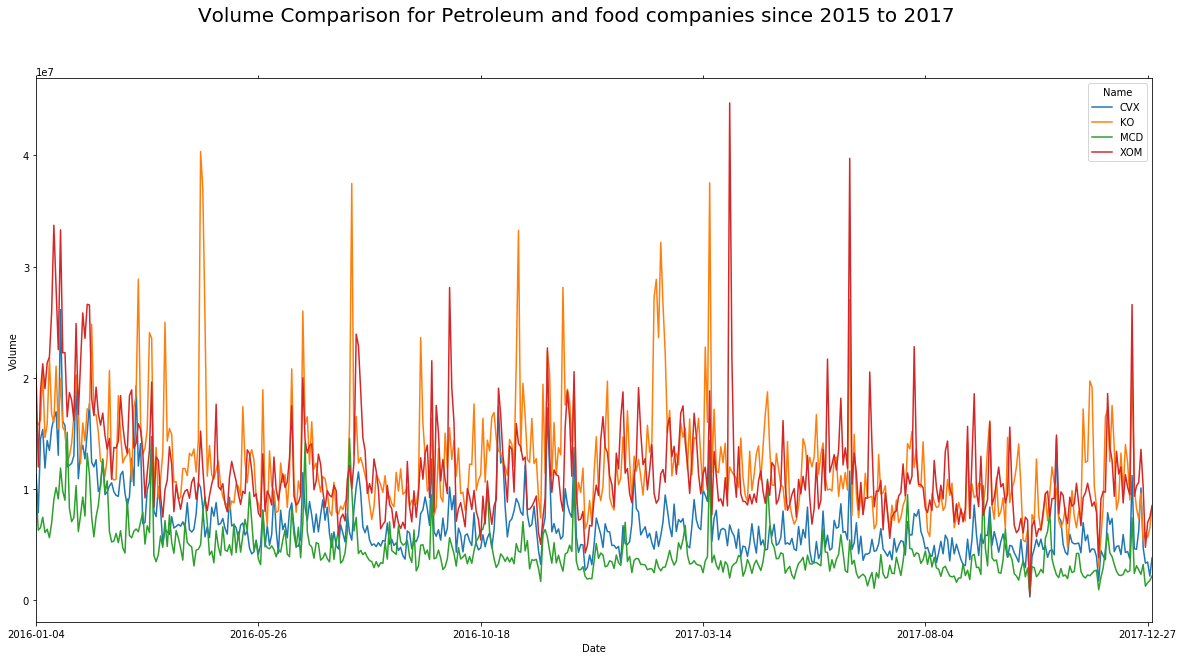

In [141]:
foodTech_stocks = stocks[(stocks['Year']>='2016') & ((stocks['Name']=='CVX') | (stocks['Name']=='XOM') | (stocks['Name']=='KO') | (stocks['Name']=='MCD'))]
pivoted = pd.pivot_table(foodTech_stocks, values='Volume', columns='Name', index=['Date'])
plt.figure(figsize=(20,8))
#plt.plot(pivoted)
#plt.legend(loc=2, ncol=2)
palette = plt.get_cmap('Set1')

fig,ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Volume Comparison for Petroleum and food companies since 2015 to 2017', fontsize=20)
pivoted.plot(x_compat=True,ax=ax)

ax.xaxis.set_tick_params(reset=True)
ax.set_ylabel('Volume')
#ax.xaxis.set_major_locator(mdates.YearLocator(1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Stock Market Profits and Losses for Walmart in 2017

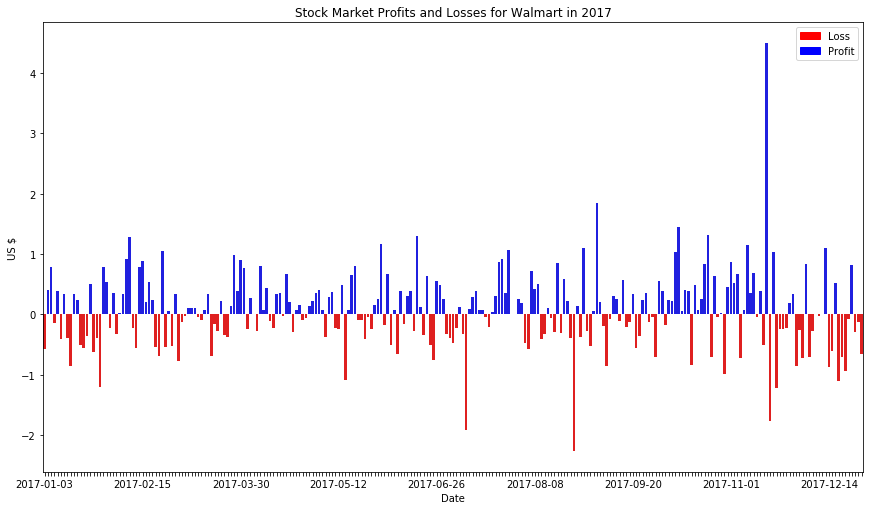

In [92]:
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

Wmt_stock = stocks[(stocks['Name']=='WMT') & (stocks['Year']>='2017')]
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

colors = ['blue' if _y >=0 else 'red' for _y in Wmt_stock['Profit']]

g = sns.barplot(x='Date',y='Profit',data=Wmt_stock,estimator=sum,palette=colors).set_title('Stock Market Profits and Losses for Walmart in 2017')
ax.set_ylabel('US $')
n = 30  # Keeps every 30th label
nimp = [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

blue_patch = mpatches.Patch(color='blue', label='Profit')
red_patch = mpatches.Patch(color='red', label='Loss')

plt.legend(handles=[red_patch, blue_patch])

## Stock history of closing prices for Nike in 2014,2015,2016 & 2017

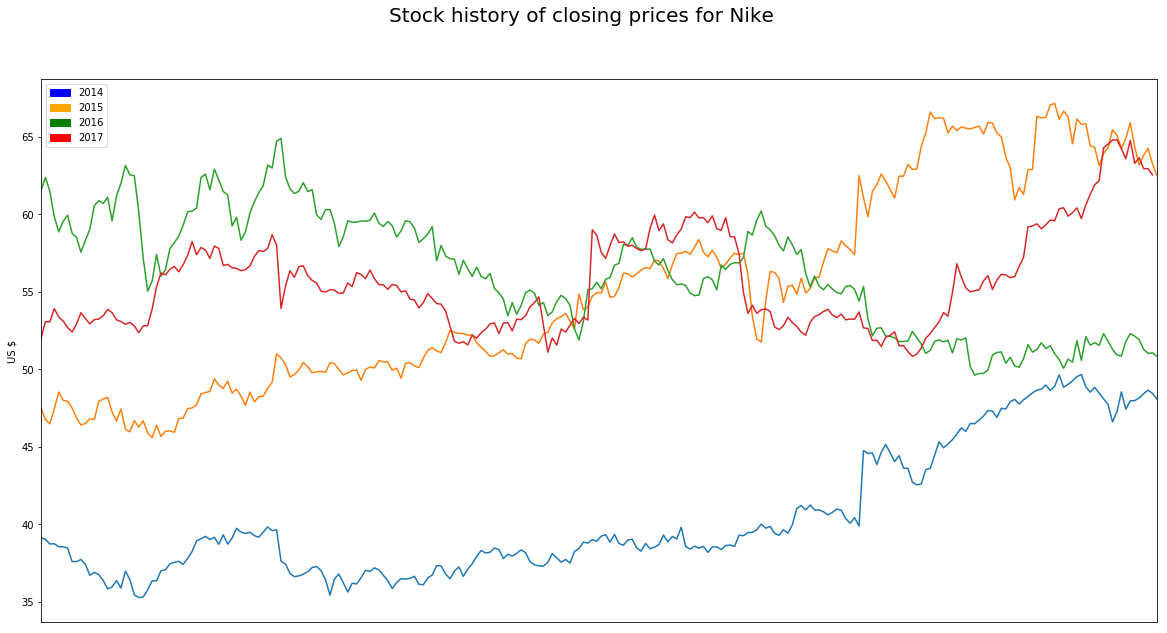

In [88]:
import matplotlib.patches as mpatches

Nike_2014 = stocks[(stocks['Year']=='2014') & (stocks['Name']=='NKE')]
Nike_2015 = stocks[(stocks['Year']=='2015') & (stocks['Name']=='NKE')]
Nike_2016 = stocks[(stocks['Year']=='2016') & (stocks['Name']=='NKE')]
Nike_2017 = stocks[(stocks['Year']=='2017') & (stocks['Name']=='NKE')]

pivoted_nike2014 = pd.pivot_table(Nike_2014, values='Close', columns='Name', index=['Date'])
pivoted_nike2015 = pd.pivot_table(Nike_2015, values='Close', columns='Name', index=['Date'])
pivoted_nike2016 = pd.pivot_table(Nike_2016, values='Close', columns='Name', index=['Date'])
pivoted_nike2017 = pd.pivot_table(Nike_2017, values='Close', columns='Name', index=['Date'])
plt.figure(figsize=(20,8))

fig,ax = plt.subplots(figsize=(20, 10))
fig.suptitle('Stock history of closing prices for Nike', fontsize=20)
pivoted_nike2014.plot(x_compat=True,ax=ax)
pivoted_nike2015.plot(x_compat=True,ax=ax)
pivoted_nike2016.plot(x_compat=True,ax=ax)
pivoted_nike2017.plot(x_compat=True,ax=ax)

ax.set_ylabel('US $')
ax.set_xlabel('')
plt.xticks([])

blue_patch = mpatches.Patch(color='blue', label='2014')
orange_patch = mpatches.Patch(color='orange', label='2015')
green_patch = mpatches.Patch(color='green', label='2016')
red_patch = mpatches.Patch(color='red', label='2017')

plt.legend(handles=[blue_patch, orange_patch, green_patch, red_patch])

plt.show()

## Stock Volume distribution by industry sectors

In [93]:
def func(x):
    if ((x=='GOOGL') | (x=='AMZN') | (x=='MSFT') | (x=='AAPL') | (x=='INTC')): 
        return 'Tech'
    if ((x=='JNJ') | (x=='UNH') | (x=='MRK') | (x=='PFE')):
        return 'Pharmaceutical'
    if ((x=='CVX') | (x=='XOM')):
        return 'Petroleum'
    if ((x=='CAT') | (x=='BA') | (x=='MMM') | (x=='UTX')):
        return 'Manufacturing'
    if ((x=='AXP') | (x=='JPM') | (x=='TRV')):
        return 'Financial'
    else:
        return 'Others'

stocks['Category'] = 'abc'
stocks['Category'] = stocks['Name'].apply(func)

Text(0.5,1,'Stock Volume distribution by industry sectors')

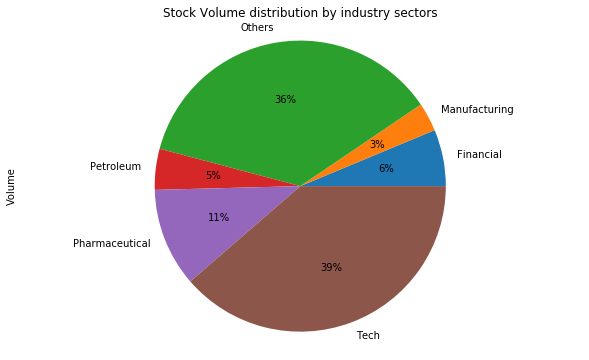

In [94]:
Vol = stocks.groupby('Category').sum()['Volume']
fig = plt.figure(figsize=(10,6))
Vol.plot(kind='pie',autopct='%1.0f%%')
plt.axis('equal')
plt.title('Stock Volume distribution by industry sectors')